### OCD Vs ADHD Mental Health Classifier

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load Dataset
df= pd.read_csv('dataset.csv')
df

,body,subreddit
0,Thank you.\n\nMy son was recently diagnosed an...,1
1,"Omg. Yes, I didn’t realize how close this was ...",0
2,I love how our positive way is to laugh of our...,1
3,"I am really, really struggling with the sudden...",0
4,i was just unconciously procrastinating doing ...,1
...,...,...
23995,I have to walk around in a particular pattern ...,0
23996,I handwash my water bottles and i may have had...,0
23997,"Love how the same people who say ""oh I'm so OC...",0
23998,i wish my brain would obsess over the tasks at...,0


In [4]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (24000, 2)


In [5]:
print(f"Columns: {df.columns.tolist()}")

Columns: ['body', 'subreddit']


In [6]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
                                                body  subreddit
0  Thank you.\n\nMy son was recently diagnosed an...          1
1  Omg. Yes, I didn’t realize how close this was ...          0
2  I love how our positive way is to laugh of our...          1
3  I am really, really struggling with the sudden...          0
4  i was just unconciously procrastinating doing ...          1


In [7]:
# Analyze Class Distribution
class_dist = df['subreddit'].value_counts()
print("Class Distribution:")
print(f"ADHD posts (0): {class_dist[0]}")
print(f"OCD posts (1): {class_dist[1]}")

Class Distribution:
ADHD posts (0): 12000
OCD posts (1): 12000


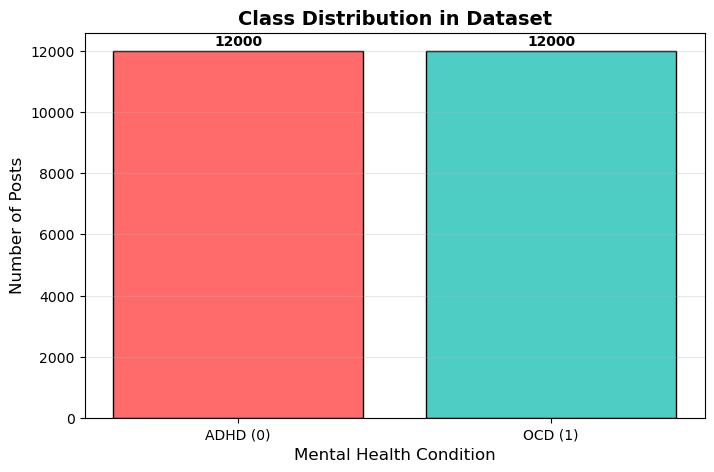

In [8]:
# Visualization
plt.figure(figsize=(8, 5))
colors = ['#FF6B6B', '#4ECDC4']
plt.bar(['ADHD (0)', 'OCD (1)'], [class_dist[0], class_dist[1]], 
        color=colors, edgecolor='black')
plt.title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Mental Health Condition', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.text(0, class_dist[0]+200, str(class_dist[0]), ha='center', fontweight='bold')
plt.text(1, class_dist[1]+200, str(class_dist[1]), ha='center', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [9]:
df.isnull().sum()

body         0
subreddit    0
dtype: int64

In [10]:
# Find all duplicates in the 'body' column
duplicates = df[df.duplicated(subset='body', keep=False)]

# Group by body text and subreddit (class) to see counts
duplicates_summary = duplicates.groupby(['body', 'subreddit']).size().reset_index(name='count')

# Show the duplicates with counts
print(duplicates_summary)


                                                 body  subreddit  count
0   Call Of The Void, basically? COTV is one of th...          0      2
1   Honestly? This whole COVID thing has been rath...          0      2
2   I HAVE TO WRITE AN EMAIL TOO! Literally no dow...          1      2
3   I just came out of the shower and this reminde...          1      2
4   I love the way it looks, with the bit of shaki...          0      2
5   I struggle to clean because I tend more toward...          0      2
6   If you or someone you know is contemplating su...          0      2
7   It took me 4 months to return over $200 worth ...          1      2
8   I’d like to get back the ability to travel wit...          0      2
9   My life...\n\nLike, I know I’m going to be the...          1      2
10  My whole heart and soul are with you on this o...          1      2
11  Oh my God I haven’t checked mine in months lik...          1      2
12  Ohh man. My tactic (my very inconsistent but e...          1

C:\Users\Admin\AppData\Local\Temp\ipykernel_14472\2200643881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subreddit', y='count', data=dup_counts, palette='viridis')


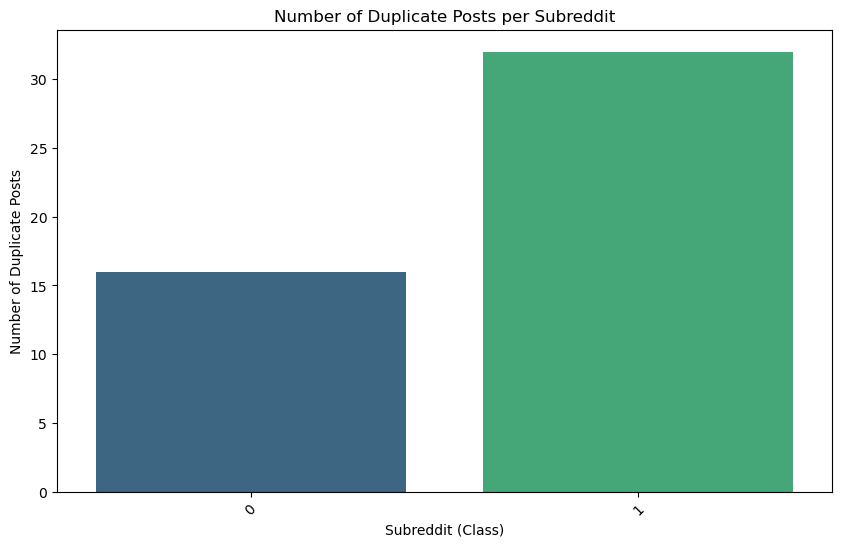

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count duplicates per class
dup_counts = duplicates.groupby('subreddit').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='subreddit', y='count', data=dup_counts, palette='viridis')
plt.title('Number of Duplicate Posts per Subreddit')
plt.xlabel('Subreddit (Class)')
plt.ylabel('Number of Duplicate Posts')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Duplicate analysis and removal
print("Total rows before duplicate removal:", len(df))
print("Number of duplicate posts (based on 'body'):", df['body'].duplicated().sum())

# Show duplicates per class
duplicates_per_class = df[df['body'].duplicated(keep=False)].groupby('subreddit').size()
print("\nDuplicates per subreddit:")
print(duplicates_per_class)

# Remove duplicates (keep first occurrence)
df_clean = df.drop_duplicates(subset='body', keep='first').copy()

print("\nTotal rows after removal:", len(df_clean))
print("Final class distribution:")
print(df_clean['subreddit'].value_counts())


Total rows before duplicate removal: 24000
Number of duplicate posts (based on 'body'): 24

Duplicates per subreddit:
subreddit
0    16
1    32
dtype: int64

Total rows after removal: 23976
Final class distribution:
subreddit
0    11992
1    11984
Name: count, dtype: int64


FINAL CLASS DISTRIBUTION (After Cleaning)
Total unique posts: 23976
ADHD posts (subreddit=0): 11992
OCD posts (subreddit=1): 11984
Dataset balance: 1.00:1


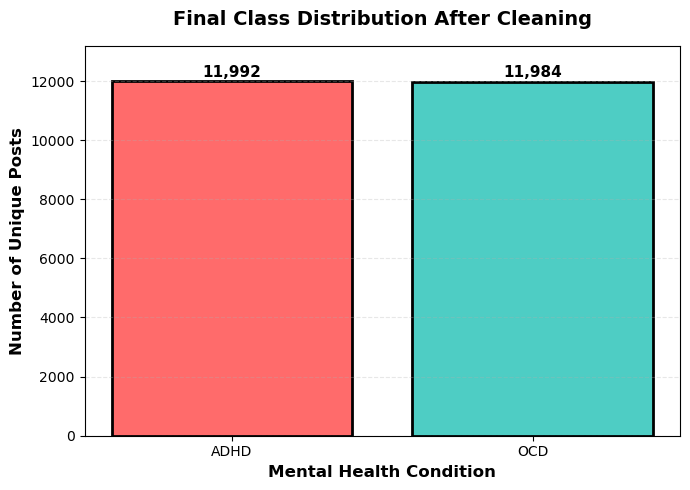

In [13]:

# FINAL CLASS DISTRIBUTION

print("FINAL CLASS DISTRIBUTION (After Cleaning)")

# Get final counts
adhd_final = len(df_clean[df_clean['subreddit'] == 0])
ocd_final = len(df_clean[df_clean['subreddit'] == 1])
total_final = len(df_clean)

# Print distribution
print(f"Total unique posts: {total_final}")
print(f"ADHD posts (subreddit=0): {adhd_final}")
print(f"OCD posts (subreddit=1): {ocd_final}")
print(f"Dataset balance: {adhd_final/ocd_final:.2f}:1")

# Final visualization
plt.figure(figsize=(7, 5))
colors = ['#FF6B6B', '#4ECDC4']
conditions = ['ADHD', 'OCD']
counts = [adhd_final, ocd_final]

bars = plt.bar(conditions, counts, color=colors, edgecolor='black', linewidth=2)

plt.title('Final Class Distribution After Cleaning', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Mental Health Condition', fontsize=12, fontweight='bold')
plt.ylabel('Number of Unique Posts', fontsize=12, fontweight='bold')
plt.ylim(0, max(counts) * 1.1)

# Add count labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}',  # Format with commas for thousands
             ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### TF-IDF Vectorization

        text_length    word_count
count  24000.000000  24000.000000
mean     254.567375     47.854792
std      313.339996     57.717743
min       51.000000      1.000000
25%       92.000000     18.000000
50%      157.000000     30.000000
75%      291.000000     55.000000
max     7790.000000   1415.000000


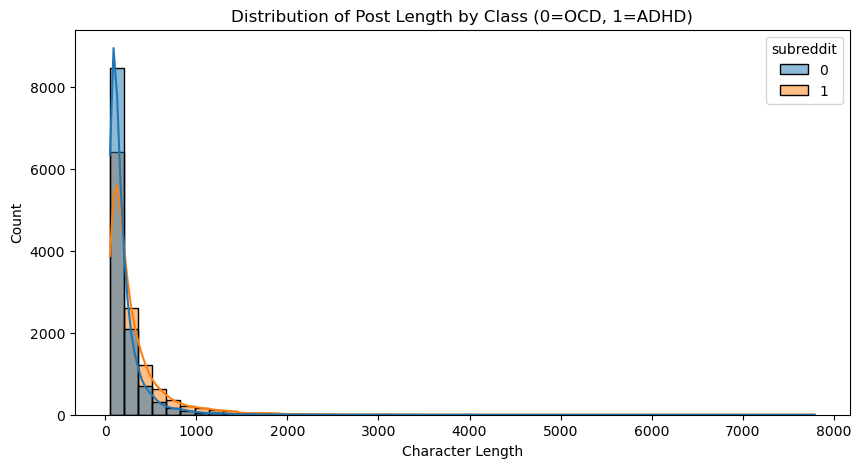

In [27]:
# Text length analysis
df['text_length'] = df['body'].apply(len)
df['word_count'] = df['body'].apply(lambda x: len(x.split()))

print(df[['text_length', 'word_count']].describe())

# Plot text length distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_length', hue='subreddit', bins=50, kde=True)
plt.title('Distribution of Post Length by Class (0=OCD, 1=ADHD)')
plt.xlabel('Character Length')
plt.show()

## Preprocessing the data 

In [30]:
#!pip install emoji

In [32]:
import re
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Expanded negation list
negation_words = {
    "not", "no", "never", "none", "nobody", "nothing", "nowhere", 
    "neither", "nor", "hardly", "scarcely", "barely", "cannot"
}

def preprocess(text):
    if not isinstance(text, str) or not text.strip():
        return ""
    
    # Step 1: Lowercase
    text = text.lower()
    
    # Step 2: Expand contractions
    text = contractions.fix(text)
    
    # Step 3: Remove URLs and Reddit mentions
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'r/\w+|u/\w+', '', text)
    
    # Step 4: Remove emojis
    text = emoji.replace_emoji(text, replace='')
    
    # Step 5: Remove markdown / HTML entities
    text = re.sub(r'\[.*?\]|\(.*?\)', '', text)
    text = re.sub(r'&[a-z]+;', ' ', text)  # &amp;, &lt;, &gt;
    text = re.sub(r'\*{1,3}', '', text)  # bold/italic markers
    
    # Step 6: Remove unwanted characters (keep basic punctuation)
    text = re.sub(r'[^\w\s.,!?\'-]', ' ', text)
    
    # Step 7: Remove standalone numbers
    text = re.sub(r'\b\d+\b', ' ', text)
    
    # Step 8: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Step 9: Tokenize
    tokens = text.split()
    
    # Step 10: Handle negations carefully
    processed_tokens = []
    i = 0
    while i < len(tokens):
        token = tokens[i]
        if token in negation_words and i + 1 < len(tokens):
            next_token = tokens[i + 1]
            # merge only if next token is a valid word
            if next_token.isalpha():
                processed_tokens.append(f"{token}_{next_token}")
                i += 2
                continue
        processed_tokens.append(token)
        i += 1
    
    # Step 11: Remove stopwords but keep negated tokens
    filtered_tokens = [t for t in processed_tokens if (t not in stop_words or '_' in t)]
    
    # Step 12: Remove very short non-negated words (<3)
    filtered_tokens = [t for t in filtered_tokens if len(t) > 2 or '_' in t]
    
    # Step 13: Lemmatize
    lemmatized_tokens = []
    for t in filtered_tokens:
        if '_' in t:
            neg, word = t.split('_', 1)
            lemmatized_word = lemmatizer.lemmatize(word)
            lemmatized_tokens.append(f"{neg}_{lemmatized_word}")
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(t))
    
    # Step 14: Join back
    result = ' '.join(lemmatized_tokens)
    return result


In [36]:
#!pip install contractions


In [38]:
import contractions
# Apply the preprocessing function to text column
df_clean['clean_text'] = df_clean['body'].apply(preprocess)

# Check the first few cleaned posts
df_clean[['body', 'clean_text']].head(5)


,body,clean_text
0,Thank you.\n\nMy son was recently diagnosed an...,thank you. son recently diagnosed want whateve...
1,"Omg. Yes, I didn’t realize how close this was ...","omg. yes, not_realize close obsession-compulsi..."
2,I love how our positive way is to laugh of our...,love positive way laugh say fuck it. accept sh...
3,"I am really, really struggling with the sudden...","really, really struggling sudden change right...."
4,i was just unconciously procrastinating doing ...,unconciously procrastinating homework thank


In [39]:
# Rename 'clean_text' to 'cleaned_text' for consistency
df_clean.rename(columns={'clean_text': 'cleaned_text'}, inplace=True)


print(f"Columns in dataframe: {list(df_clean.columns)}")

Columns in dataframe: ['body', 'subreddit', 'cleaned_text']


TEXT ANALYSIS AFTER PREPROCESSING
OVERALL STATISTICS:
Total posts: 23,976
Average words per post: 22.3
Average characters per post: 154.0
Minimum words: 0
Maximum words: 645
BY CONDITION:

ADHD:
 Posts: 11,992
 Avg words: 18.0
 Min words: 0
 Max words: 588

OCD:
 Posts: 11,984
 Avg words: 26.7
 Min words: 0
 Max words: 645
NEGATION PRESERVATION:
Posts containing negations: 11552
Percentage: 48.2%
TOP 10 MOST COMMON NEGATIONS:
 not_have: 895 times
 not_know: 865 times
 not_even: 487 times
 not_want: 418 times
 not_a: 384 times
 not_get: 331 times
 not_be: 326 times
 not_the: 296 times
 not_do: 275 times
 not_think: 244 times


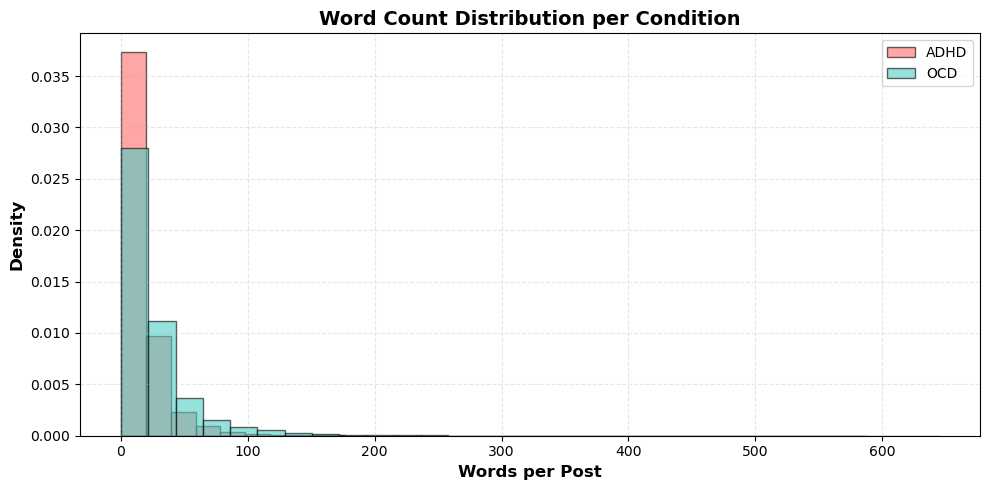

In [40]:
print("TEXT ANALYSIS AFTER PREPROCESSING")
print("="*60)

# Calculate text statistics
df_clean['word_count'] = df_clean['cleaned_text'].apply(lambda x: len(str(x).split()))
df_clean['char_count'] = df_clean['cleaned_text'].apply(len)

print("OVERALL STATISTICS:")
print(f"Total posts: {len(df_clean):,}")
print(f"Average words per post: {df_clean['word_count'].mean():.1f}")
print(f"Average characters per post: {df_clean['char_count'].mean():.1f}")
print(f"Minimum words: {df_clean['word_count'].min()}")
print(f"Maximum words: {df_clean['word_count'].max()}")

print("BY CONDITION:")
for label, name in [(0, 'ADHD'), (1, 'OCD')]:
    subset = df_clean[df_clean['subreddit'] == label]
    print(f"\n{name}:")
    print(f" Posts: {len(subset):,}")
    print(f" Avg words: {subset['word_count'].mean():.1f}")
    print(f" Min words: {subset['word_count'].min()}")
    print(f" Max words: {subset['word_count'].max()}")

# Negation analysis av
negation_count = df_clean['cleaned_text'].str.contains('_').sum()
print(f"NEGATION PRESERVATION:")
print(f"Posts containing negations: {negation_count}")
print(f"Percentage: {negation_count/len(df_clean)*100:.1f}%")

# Check for common negations
if negation_count > 0:
    all_words = ' '.join(df_clean['cleaned_text']).split()
    negation_words = [word for word in all_words if '_' in word]
    from collections import Counter
    common_negs = Counter(negation_words).most_common(10)
    print(f"TOP 10 MOST COMMON NEGATIONS:")
    for neg, count in common_negs:
        print(f" {neg}: {count} times")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Colors for classes
colors = {'ADHD': '#FF6B6B', 'OCD': '#4ECDC4'}

plt.figure(figsize=(10, 5))

# Histogram: Word count distribution per class
for label, name in [(0, 'ADHD'), (1, 'OCD')]:
    subset = df_clean[df_clean['subreddit'] == label]
    plt.hist(subset['word_count'], bins=30, alpha=0.6, 
             label=name, color=colors[name], edgecolor='black', density=True)

plt.title('Word Count Distribution per Condition', fontsize=14, fontweight='bold')
plt.xlabel('Words per Post', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


In [41]:
from sklearn.model_selection import train_test_split

# Features: cleaned text
X = df_clean['cleaned_text']

# Labels: subreddit (0=ADHD, 1=OCD)
y = df_clean['subreddit']

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 19180, Testing samples: 4796


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size
    ngram_range=(1,2),  # Unigrams + bigrams
    stop_words=None     # Already removed stopwords in preprocessing
)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF feature shape:")
print(X_train_tfidf.shape)


TF-IDF feature shape:
(19180, 5000)


Naïve Bayes Accuracy: 83.99%

              precision    recall  f1-score   support

        ADHD       0.84      0.84      0.84      2399
         OCD       0.84      0.84      0.84      2397

    accuracy                           0.84      4796
   macro avg       0.84      0.84      0.84      4796
weighted avg       0.84      0.84      0.84      4796



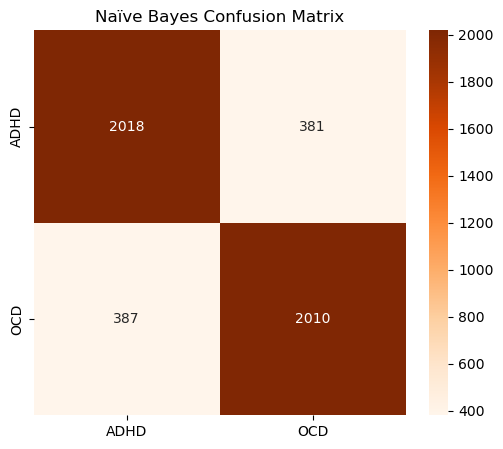

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Train Naïve Bayes
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {acc_nb*100:.2f}%\n")

# Classification report
print(classification_report(y_test, y_pred_nb, target_names=['ADHD','OCD']))

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Naïve Bayes Confusion Matrix')
plt.show()


Logistic Regression Accuracy: 84.57%

              precision    recall  f1-score   support

        ADHD       0.85      0.83      0.84      2399
         OCD       0.84      0.86      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



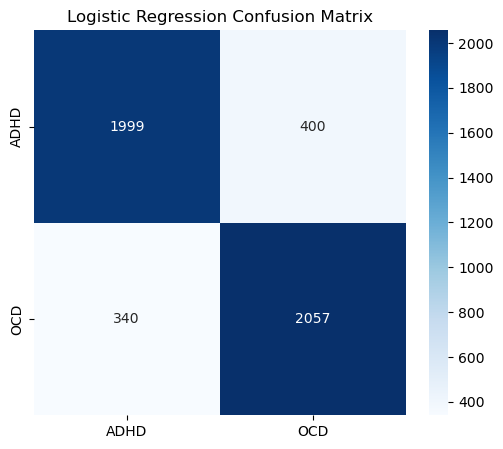

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_tfidf)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr*100:.2f}%\n")

# Classification report
print(classification_report(y_test, y_pred_lr, target_names=['ADHD','OCD']))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Linear SVM Accuracy: 83.34%

              precision    recall  f1-score   support

        ADHD       0.84      0.83      0.83      2399
         OCD       0.83      0.84      0.83      2397

    accuracy                           0.83      4796
   macro avg       0.83      0.83      0.83      4796
weighted avg       0.83      0.83      0.83      4796



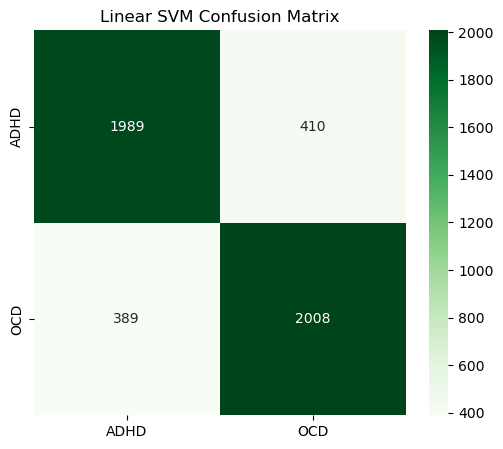

In [56]:
from sklearn.svm import LinearSVC

# Train Linear SVM
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_tfidf)

# Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Linear SVM Accuracy: {acc_svm*100:.2f}%\n")

# Classification report
print(classification_report(y_test, y_pred_svm, target_names=['ADHD','OCD']))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Linear SVM Confusion Matrix')
plt.show()


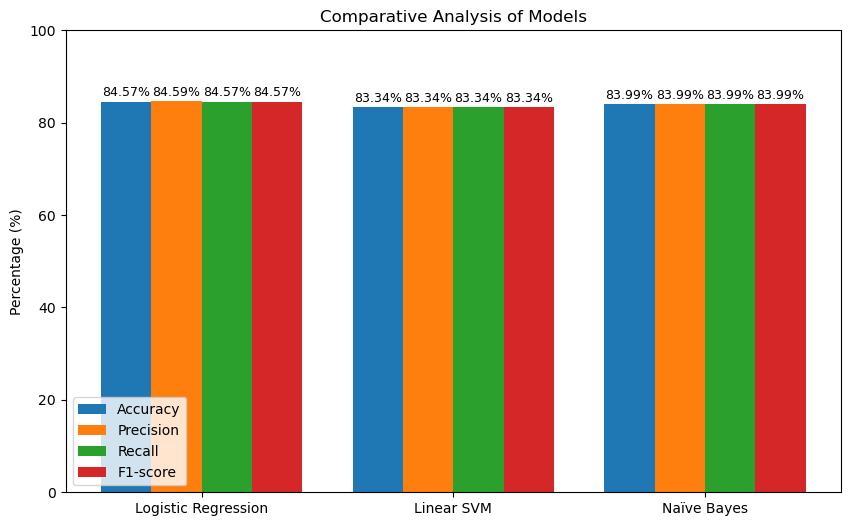

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return acc*100, prec*100, rec*100, f1*100

metrics_lr = get_metrics(y_test, y_pred_lr)
metrics_svm = get_metrics(y_test, y_pred_svm)
metrics_nb = get_metrics(y_test, y_pred_nb)

models = ['Logistic Regression', 'Linear SVM', 'Naïve Bayes']
metrics = np.array([metrics_lr, metrics_svm, metrics_nb])
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Plot
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
for i in range(4):
    plt.bar(x + i*width - 1.5*width, metrics[:,i], width, label=labels[i])

# Add percentage values on top
for i in range(len(models)):
    for j in range(4):
        plt.text(x[i] + j*width - 1.5*width, metrics[i,j] + 0.5, f'{metrics[i,j]:.2f}%', 
                 ha='center', va='bottom', fontsize=9)

plt.xticks(x, models)
plt.ylim(0, 100)
plt.ylabel('Percentage (%)')
plt.title('Comparative Analysis of Models')
plt.legend()
plt.show()


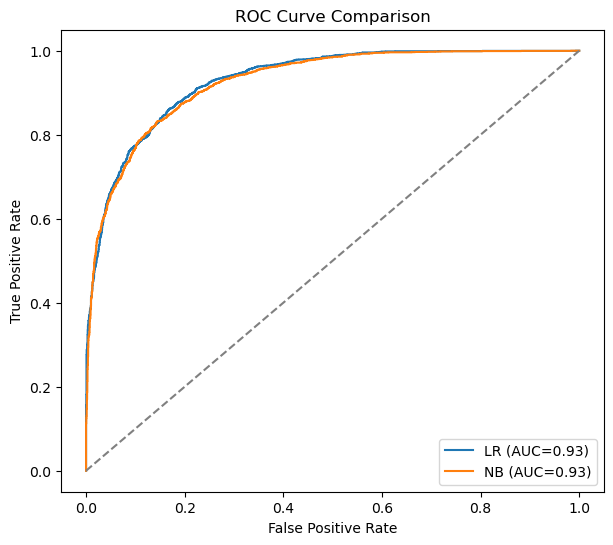

In [60]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
y_prob_lr = lr_model.predict_proba(X_test_tfidf)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Naïve Bayes
y_prob_nb = nb_model.predict_proba(X_test_tfidf)[:,1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot all
plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'NB (AUC={auc_nb:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [62]:
# trying to imporve accuracy 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=10000,  # Limit vocabulary size
    ngram_range=(1,3),  # Unigrams + bigrams
    min_df=5,    # Ignore words that appear in fewer than 5 documents
    max_df=0.9   # Ignore words that appear in >90% of documents

)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF feature shape:")
print(X_train_tfidf.shape)


TF-IDF feature shape:
(19180, 10000)


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(max_iter=2000), {'C': [0.01,0.1,1,5,10]}, cv=5, scoring='accuracy')
grid_lr.fit(X_train_tfidf, y_train)
print("Best LR params:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_

# Linear SVM
grid_svm = GridSearchCV(LinearSVC(max_iter=2000), {'C': [0.01,0.1,1,5,10]}, cv=5, scoring='accuracy')
grid_svm.fit(X_train_tfidf, y_train)
print("Best SVM params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

# Naïve Bayes
grid_nb = GridSearchCV(MultinomialNB(), {'alpha': [0.1,0.5,1.0,1.5,2.0]}, cv=5, scoring='accuracy')
grid_nb.fit(X_train_tfidf, y_train)
print("Best NB params:", grid_nb.best_params_)
best_nb = grid_nb.best_estimator_



Best LR params: {'C': 1}
Best SVM params: {'C': 0.1}
Best NB params: {'alpha': 1.5}


In [103]:
# After grid search, evaluate each optimized model individually

# Evaluate Optimized Logistic Regression
y_pred_lr_opt = best_lr.predict(X_test_tfidf)
acc_lr_opt = accuracy_score(y_test, y_pred_lr_opt)
print(f"Optimized Logistic Regression Accuracy: {acc_lr_opt*100:.2f}%")
print(f"  Improvement over baseline: {acc_lr_opt*100 - 84.57:.2f}%")

# Evaluate Optimized SVM
y_pred_svm_opt = best_svm.predict(X_test_tfidf) 
acc_svm_opt = accuracy_score(y_test, y_pred_svm_opt)
print(f"Optimized SVM Accuracy: {acc_svm_opt*100:.2f}%")
print(f"  Improvement over baseline: {acc_svm_opt*100 - 83.34:.2f}%")

# Evaluate Optimized Naïve Bayes
y_pred_nb_opt = best_nb.predict(X_test_tfidf)
acc_nb_opt = accuracy_score(y_test, y_pred_nb_opt)
print(f"Optimized Naïve Bayes Accuracy: {acc_nb_opt*100:.2f}%")
print(f"  Improvement over baseline: {acc_nb_opt*100 - 83.99:.2f}%")

Optimized Logistic Regression Accuracy: 84.84%
  Improvement over baseline: 0.27%
Optimized SVM Accuracy: 84.82%
  Improvement over baseline: 1.48%
Optimized Naïve Bayes Accuracy: 84.67%
  Improvement over baseline: 0.68%


## Hard Voting

In [129]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm),
        ('nb', best_nb)
    ],
    voting='hard'  # Use 'hard' voting
)

ensemble.fit(X_train_tfidf, y_train)
y_pred_ensemble = ensemble.predict(X_test_tfidf)

acc_hard_voting = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Accuracy (hard voting): {acc_hard_voting*100:.2f}%')


Ensemble Accuracy (hard voting): 85.05%


## Soft Voting 

In [131]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Models
lr_model = LogisticRegression(max_iter=2000, C=1, random_state=42)
svm_model = SVC(kernel='linear', probability=True, C=1, random_state=42)  # probability=True
nb_model = MultinomialNB(alpha=1.0)

# Ensemble using soft voting
ensemble = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('svm', svm_model),
        ('nb', nb_model)
    ],
    voting='soft'  # soft voting uses predict_proba
)

# Train ensemble
ensemble.fit(X_train_tfidf, y_train)

# Predict
y_pred_ensemble = ensemble.predict(X_test_tfidf)

# Accuracy
acc_soft_voting = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Accuracy (soft voting): {acc_soft_voting*100:.2f}%')


Ensemble Accuracy (soft voting): 85.13%


## Stacking

Stacking Ensemble Accuracy: 85.40%

Classification Report:

              precision    recall  f1-score   support

        ADHD       0.85      0.86      0.85      2399
         OCD       0.86      0.85      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



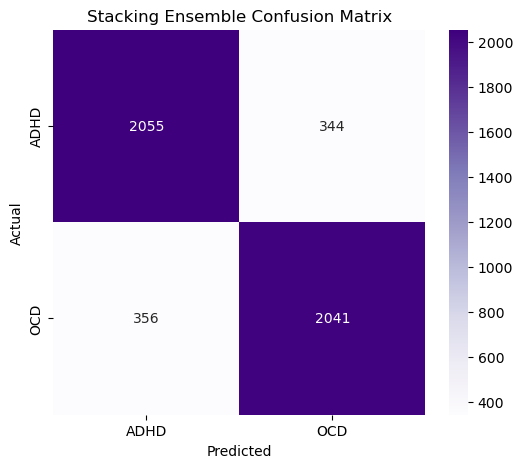

In [78]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Base Models
# Logistic Regression (already tuned)
best_lr = LogisticRegression(C=1, max_iter=2000, random_state=42)

# Linear SVM (wrap in CalibratedClassifierCV for probabilities)
best_svm = LinearSVC(max_iter=1000, random_state=42)
best_svm_cal = CalibratedClassifierCV(best_svm)  # wraps SVM
best_svm_cal.fit(X_train_tfidf, y_train)

# Naive Bayes
best_nb = MultinomialNB(alpha=1.0)
best_nb.fit(X_train_tfidf, y_train)

# Fit LR separately
best_lr.fit(X_train_tfidf, y_train)

# Stacking Ensemble
stacking = StackingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm_cal),
        ('nb', best_nb)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking.fit(X_train_tfidf, y_train)

# Predictions & Evaluation
y_pred_stack = stacking.predict(X_test_tfidf)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Ensemble Accuracy: {acc_stack*100:.2f}%\n')

print("Classification Report:\n")
print(classification_report(y_test, y_pred_stack, target_names=['ADHD', 'OCD']))

# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(6,5))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Purples', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Ensemble Confusion Matrix')
plt.show()


In [132]:
# COMPARATIVE ANALYSIS 
print("\n" + "="*70)
print("COMPARATIVE ANALYSIS")
print("="*70)

# 1. BASELINE RESULTS 
print("\n1. BASELINE MODELS (Original 5000 features):")
print(f"   Naïve Bayes:     {acc_nb*100:.2f}%")
print(f"   Logistic Reg:    {acc_lr*100:.2f}%")
print(f"   SVM:             {acc_svm*100:.2f}%")

# 2. Get OPTIMIZED individual model predictions
print("\n2. OPTIMIZED INDIVIDUAL MODELS (10000 features + GridSearch):")
# These are the models we got from GridSearch
y_pred_lr_opt = best_lr.predict(X_test_tfidf)  # 10000 features version
acc_lr_opt = accuracy_score(y_test, y_pred_lr_opt)

y_pred_svm_opt = best_svm.predict(X_test_tfidf)
acc_svm_opt = accuracy_score(y_test, y_pred_svm_opt)

y_pred_nb_opt = best_nb.predict(X_test_tfidf)
acc_nb_opt = accuracy_score(y_test, y_pred_nb_opt)

print(f"   Naïve Bayes:     {acc_nb_opt*100:.2f}%")
print(f"   Logistic Reg:    {acc_lr_opt*100:.2f}%")
print(f"   SVM:             {acc_svm_opt*100:.2f}%")

# 3. ENSEMBLE RESULTS 
print("\n3. ENSEMBLE METHODS:")
print(f"   Hard Voting:     {acc_hard_voting*100:.2f}%")  
print(f"   Soft Voting:     {acc_soft_voting*100:.2f}%")  
print(f"   Stacking:        {acc_stack*100:.2f}%")  



COMPARATIVE ANALYSIS

1. BASELINE MODELS (Original 5000 features):
   Naïve Bayes:     83.99%
   Logistic Reg:    84.57%
   SVM:             83.34%

2. OPTIMIZED INDIVIDUAL MODELS (10000 features + GridSearch):
   Naïve Bayes:     84.67%
   Logistic Reg:    84.84%
   SVM:             84.82%

3. ENSEMBLE METHODS:
   Hard Voting:     85.05%
   Soft Voting:     85.13%
   Stacking:        85.40%


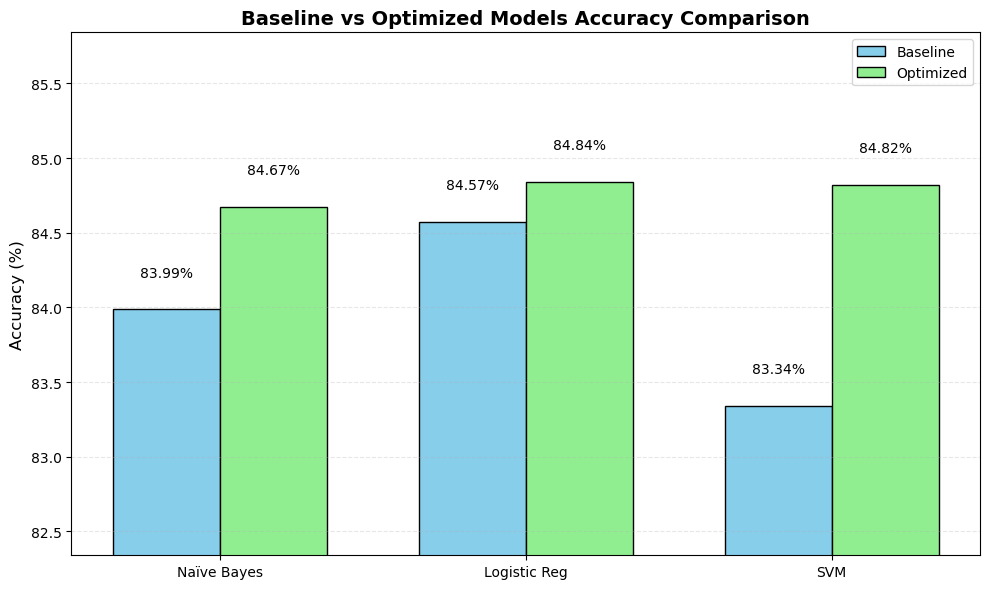

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Naïve Bayes', 'Logistic Reg', 'SVM']

# Accuracy values
baseline_scores = [acc_nb*100, acc_lr*100, acc_svm*100]
optimized_scores = [acc_nb_opt*100, acc_lr_opt*100, acc_svm_opt*100]

# Bar positions
x = np.arange(len(models))
width = 0.35  # width of each bar

# Create figure
plt.figure(figsize=(10,6))

# Plot bars
plt.bar(x - width/2, baseline_scores, width, color='skyblue', edgecolor='black', label='Baseline')
plt.bar(x + width/2, optimized_scores, width, color='lightgreen', edgecolor='black', label='Optimized')

# Add labels and title
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(min(baseline_scores)-1, max(optimized_scores)+1)  # auto adjust to range
plt.title('Baseline vs Optimized Models Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, models)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend()

# Annotate values on top of bars
for i in range(len(models)):
    plt.text(x[i] - width/2, baseline_scores[i] + 0.2, f'{baseline_scores[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + width/2, optimized_scores[i] + 0.2, f'{optimized_scores[i]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [137]:
# FINAL SUMMARY TABLE

print("\n" + "="*70)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*70)

summary_data = {
    'Model': ['Naïve Bayes (Baseline)', 'Logistic Reg (Baseline)', 'SVM (Baseline)',
              'Naïve Bayes (Optimized)', 'Logistic Reg (Optimized)', 'SVM (Optimized)',
              'Hard Voting Ensemble', 'Soft Voting Ensemble', 'Stacking Ensemble'],
    'Accuracy (%)': [round(acc_nb*100, 2), round(acc_lr*100, 2), round(acc_svm*100, 2),
                     round(acc_nb_opt*100, 2), round(acc_lr_opt*100, 2), round(acc_svm_opt*100, 2),
                     round(acc_hard_voting*100, 2), round(acc_soft_voting*100, 2), round(acc_stack*100, 2)],
    'TF-IDF Features': [5000, 5000, 5000, 10000, 10000, 10000, 10000, 10000, 10000],  # added last value
    'Parameters': ['Default', 'Default', 'Default', 
                   'GridSearch', 'GridSearch', 'GridSearch',
                   'Ensemble', 'Ensemble', 'Ensemble']
}


summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

# Rank by accuracy
print("\n" + "-"*70)
print("RANKING BY ACCURACY:")
print("-"*70)

ranked_df = summary_df.sort_values('Accuracy (%)', ascending=False)
for i, (_, row) in enumerate(ranked_df.iterrows(), 1):
    print(f"{i}. {row['Model']:25} {row['Accuracy (%)']:.2f}%")

print("\n" + "="*70)
print("KEY FINDINGS:")
print("="*70)
print(f"1. Best Individual Model: {ranked_df.iloc[0]['Model']} ({ranked_df.iloc[0]['Accuracy (%)']:.2f}%)")

# Calculate improvements
lr_improvement = acc_lr_opt*100 - acc_lr*100
print(f"2. Optimization improved Logistic Regression by {lr_improvement:+.2f}%")

svm_improvement = acc_svm_opt*100 - acc_svm*100
print(f"3. Optimization improved SVM by {svm_improvement:+.2f}%")

nb_improvement = acc_nb_opt*100 - acc_nb*100
print(f"4. Optimization improved Naïve Bayes by {nb_improvement:+.2f}%")

stacking_improvement = acc_stack*100 - acc_lr*100
print(f"5. Stacking Ensemble is {stacking_improvement:+.2f}% better than baseline Logistic Regression")

# Find which model improved the most
improvements = {
    'Logistic Regression': lr_improvement,
    'SVM': svm_improvement,
    'Naïve Bayes': nb_improvement
}
most_improved = max(improvements, key=improvements.get)
print(f"6. Most improved with optimization: {most_improved} ({improvements[most_improved]:+.2f}%)")



FINAL MODEL PERFORMANCE SUMMARY

                    Model  Accuracy (%)  TF-IDF Features Parameters
  Naïve Bayes (Baseline)         83.99             5000    Default
 Logistic Reg (Baseline)         84.57             5000    Default
          SVM (Baseline)         83.34             5000    Default
 Naïve Bayes (Optimized)         84.67            10000 GridSearch
Logistic Reg (Optimized)         84.84            10000 GridSearch
         SVM (Optimized)         84.82            10000 GridSearch
    Hard Voting Ensemble         85.05            10000   Ensemble
    Soft Voting Ensemble         85.13            10000   Ensemble
       Stacking Ensemble         85.40            10000   Ensemble

----------------------------------------------------------------------
RANKING BY ACCURACY:
----------------------------------------------------------------------
1. Stacking Ensemble         85.40%
2. Soft Voting Ensemble      85.13%
3. Hard Voting Ensemble      85.05%
4. Logistic Reg (Optimi

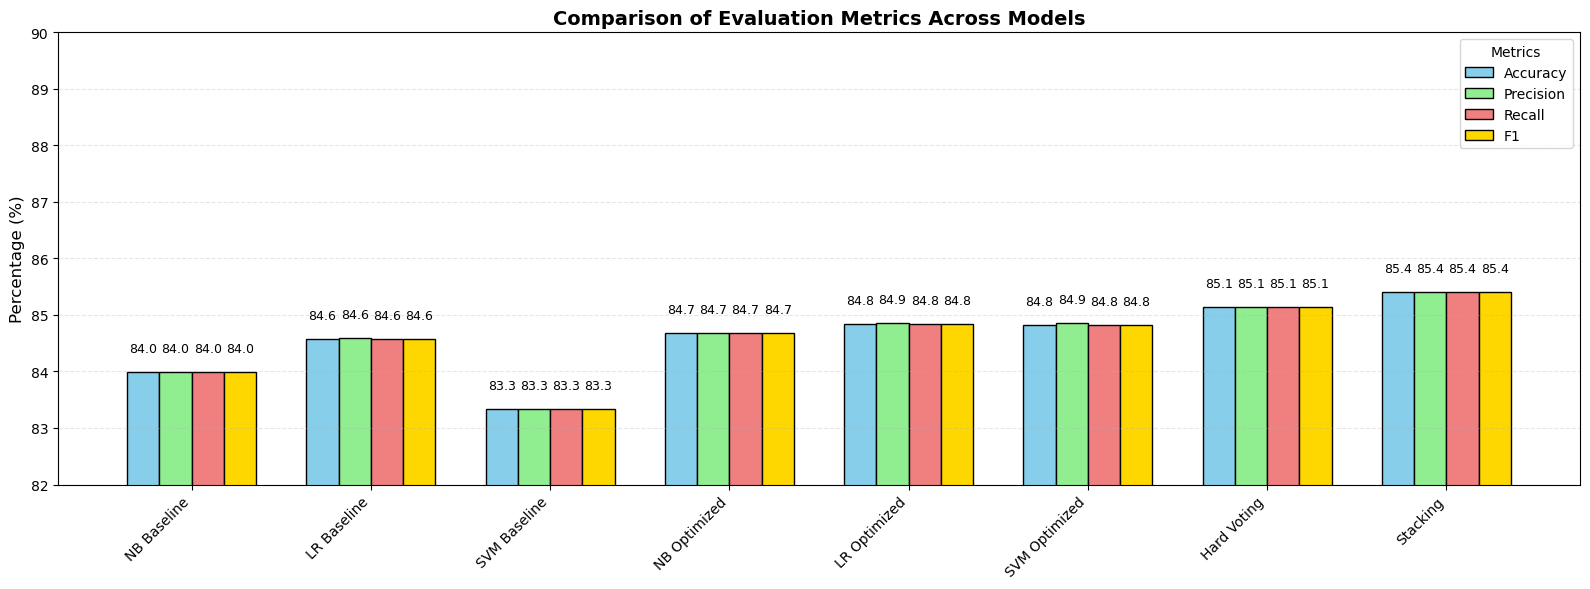

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and models
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
models = metrics_df['Model'].tolist()
num_metrics = len(metrics_to_plot)
num_models = len(models)

# Set positions for each group of bars
x = np.arange(num_models)
width = 0.18  

# Colors for each metric
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

plt.figure(figsize=(16,6))

# Plot each metric
for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width - (width*num_metrics)/2 + width/2, metrics_df[metric],
            width=width, color=colors[i], label=metric, edgecolor='black')

# Add labels and title
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Comparison of Evaluation Metrics Across Models', fontsize=14, fontweight='bold')
plt.ylim(82, 90)  # focus on high-performance range
plt.legend(title='Metrics')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Annotate values on top of bars
for i in range(num_models):
    for j in range(num_metrics):
        plt.text(x[i] + j*width - (width*num_metrics)/2 + width/2,
                 metrics_df[metrics_to_plot[j]][i] + 0.3,
                 f"{metrics_df[metrics_to_plot[j]][i]:.1f}",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [75]:
# Find misclassified examples
misclassified_indices = np.where(y_pred_ensemble != y_test)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)}")

# Analyze some misclassified examples
for idx in misclassified_indices[:5]:
    print(f"\nTrue label: {'ADHD' if y_test.iloc[idx] == 0 else 'OCD'}")
    print(f"Predicted: {'ADHD' if y_pred_ensemble[idx] == 0 else 'OCD'}")
    print(f"Text snippet: {X_test.iloc[idx][:200]}...")

Number of misclassified samples: 717

True label: OCD
Predicted: ADHD
Text snippet: hit really close home. paralyse accurate...

True label: ADHD
Predicted: OCD
Text snippet: bot, bleep, bloop. someone linked thread another place reddit...

True label: ADHD
Predicted: OCD
Text snippet: happens whenever forget say next. struggle memory hoarding absolutely hate forgetting things.....

True label: ADHD
Predicted: OCD
Text snippet: holy crap! never_been diagnosed really relate this!...

True label: ADHD
Predicted: OCD
Text snippet: experience question towards often not. not_help also tourette s......


In [125]:
feature_names = np.array(tfidf.get_feature_names_out())
coef = model.coef_[0]

# Top 15 words for OCD
top_15_ocd = np.argsort(coef)[-15:][::-1]
# Top 15 words for ADHD
top_15_adhd = np.argsort(coef)[:15]

print("Top OCD words:", feature_names[top_15_ocd])
print("Top ADHD words:", feature_names[top_15_adhd])


Top OCD words: ['adhd' 'task' 'lazy' 'adderall' 'focus' 'planner' 'work' 'saved' 'smart'
 'wife' 'forget' 'homework' 'motivation' 'phone' 'alarm']
Top ADHD words: ['ocd' 'compulsion' 'obsession' 'intrusive' 'thought' 'thoughts' 'meme'
 'intrusive thought' 'fear' 'hand' 'erp' 'reassurance' 'therapist' 'door'
 'worry']
